# Stochastic, Proximal Gradient Descent 실습<br>
실습은 linear regression을 수식으로 계산한 결과와 SGD 결과를 비교하는 방식으로 진행하였다.
Proximal Gradient Descent 실습은 Lasso 함수를 PGD를 이용하여 사용하는 예시를 실행하였다. (깃헙자료 인용)

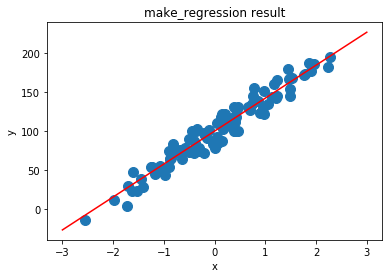

[ 80.04411439 121.33977271 111.55689458  83.65793083  64.29936151
 127.99539547  43.67646955 117.61041414 121.45106196  77.64713534
  72.53253639 109.30231368  23.50974381  71.66534768 130.69167453
 160.44298948  94.87337041 173.8599937  180.27586997  76.18523596
 151.79246305 177.47198769 100.26553814 114.16683986 145.1707474
 155.7976548  186.82359975 112.55495011 102.65610251 168.5718935
  53.2715645   78.08184949  48.94551089 130.47696641  78.26144111
 130.77464408 121.34762761  86.94299837  84.52739531  54.04187439
 134.37103842 117.49431437  29.65530293 182.21149971 114.03239007
  71.39647521 165.58603582  64.94725969 172.35951337  99.97284249
  74.93823094  28.00991267 100.73149499 123.32294685 144.45221644
 119.45487018 100.18818274   3.88926559 166.36099447  94.93999453
  64.17431869 106.50867191 142.78126731  11.83429347 -14.06791406
  38.85496078  83.24524525  87.1603681  144.97335895 187.53458591
 195.74721465  72.8947906   84.70657814 153.68666222  73.45241778
  23.1297534

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import random

X, y, w = make_regression(n_samples=100, n_features=1, bias=100, noise=10, coef=True, random_state=0)
xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)
plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression result")
plt.show()
print(y)
print(X.flatten())
print(w)

## 1. Stochastic<br>
SGD는 많은 데이터를 한번에 매 iter마다 돌리는 것이 계산량적으로 쉽지 않기 때문에 몇개 데이터를 뽑아서 update하는 것을 계속 반복하면 일반 GD와 SGD의 Expectation은 동일하다는 것을 이용한 것이다.

In [2]:
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01,safe=False):
    data = zip(x, y)
    theta = theta_0                             # initial guess
    alpha = alpha_0                             # initial step size
    min_theta, min_value = None, float("inf")   # the minimum so far
    iterations_with_no_improvement = 0
    cnt_for_inf_loop=0
    # if we ever go 100 iterations with no improvement, stop
    while ((iterations_with_no_improvement < 100)&(cnt_for_inf_loop<1e10)):
        cnt_for_inf_loop+=1
        if safe:
            if cnt_for_inf_loop>1e5:
                print('too much iter!')
                break
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in zip(x, y) )

        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            if cnt_for_inf_loop%20==1:
                print('min_theta updates',min_theta)
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            if  (iterations_with_no_improvement%20==5):
                print("iterations_with_no_improvement is growing...",iterations_with_no_improvement)
            alpha *= 0.9

        # and take a gradient step for each of the data points        
        """for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))"""
        indexes=[i for i in range(len(x))];random.shuffle(indexes)  
        for rand_i in indexes:
            gradient_i = gradient_fn(x[rand_i], y[rand_i], theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
    return min_theta

def vector_subtract(v, w):
    """subtracts corresponding elements"""
    return [v_i - w_i for v_i, w_i in zip(v, w)]
def scalar_multiply(c, v):
    """c is a number, v is a vector"""
    return [c * v_i for v_i in v]

def predict(alpha, beta, x_i):
    return beta * x_i + alpha

def error(alpha, beta, x_i, y_i):
    return y_i - predict(alpha, beta, x_i)

def squared_error(x_i, y_i, theta):
    alpha, beta = theta
    return error(alpha, beta, x_i, y_i) ** 2

def squared_error_gradient(x_i, y_i, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, x_i, y_i),       # alpha partial derivative
            -2 * error(alpha, beta, x_i, y_i) * x_i] # beta partial derivative

In [3]:
%%time
random.seed(0)
theta = [random.random(), random.random()]
alpha, beta = minimize_stochastic(squared_error, 
                                  squared_error_gradient,
                                  X.flatten(),
                                  y, 
                                  theta,
                                  0.0001)
print('Final parameter :', alpha,beta)

min_theta updates [0.8444218515250481, 0.7579544029403025]
min_theta updates [33.9208574002194, 16.343305206008583]
min_theta updates [55.84839636941508, 26.182215109695356]
min_theta updates [70.39225048539264, 32.377643396498634]
min_theta updates [80.04462138473468, 36.26622332675923]
min_theta updates [86.45311689309649, 38.698380809857]
min_theta updates [90.7111866044874, 40.2145131724563]
min_theta updates [93.54285770037812, 41.15519809404239]
min_theta updates [95.42550977082881, 41.73502903344052]
min_theta updates [96.67974830255919, 42.09141647411734]
min_theta updates [97.51349423807211, 42.307690693300124]
min_theta updates [98.06877588941107, 42.43923370116777]
min_theta updates [98.43935882399286, 42.517905073943496]
min_theta updates [98.68671063507774, 42.56477747392121]
min_theta updates [98.85219506887971, 42.59120011574564]
min_theta updates [98.96336107607306, 42.6060271092571]
min_theta updates [99.03661312793403, 42.613507173417624]
min_theta updates [99.0863371

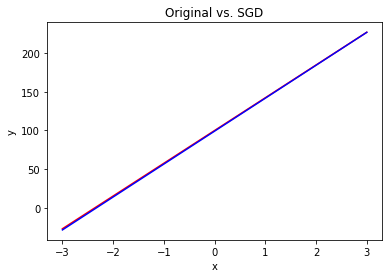

In [4]:
xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100
y1 = beta * xx + alpha
plt.plot(xx, y0, "r-")
plt.plot(xx, y1, "b-")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Original vs. SGD")
plt.show()

## 2. Proximal<br>
Reference: https://github.com/go2chayan/LASSO_Using_PGD<br>
$\min_x f(x):= \frac{1}{2}|Ax-b|^2 + \lambda|x|_1$<br>
랏소 식은 행렬의 sparsity에 대한 제한을 이용해서 noise가 낀 행렬에서 원래 값을 복원할 수 있다.<br>
아래 코드는 sparse한 벡터(행렬)을  랜덤행렬을 곱해서 선형변환을 시키고 노이즈를 더한 상태에서<br>
노이즈 벡터와 변환 행렬, 랏소 함수를 이용해서 원래 버전을 복원하는 시뮬레이션이다.

In [5]:
# Objective function: f(x) + lambda*norm1(x)
def obj(A,x,b,lamda):
    assert(np.size(x,0)==np.size(A,1) and np.size(A,0) == np.size(b,0) and \
    np.size(x,1)== np.size(b,1) == 1 and np.isscalar(lamda))
    return f(A,x,b) + lamda*np.sum(np.abs(x))

# f(x) = (1/2)||Ax-b||^2
def f(A,x,b):
    assert(np.size(x,0)==np.size(A,1) and np.size(A,0) == np.size(b,0) and \
    np.size(x,1)== np.size(b,1) == 1)
    Ax_b = A.dot(x) - b
    return 0.5*(Ax_b.T.dot(Ax_b))

# gradient of f(x)= A'(Ax - b)   
def grf(A,x,b):
    assert(np.size(x,0)==np.size(A,1) and np.size(A,0) == np.size(b,0) and \
    np.size(x,1)== np.size(b,1) == 1)
    return A.T.dot(A.dot(x) - b)
    
# Model function evaluated at x and touches f(x) in xk
def m(x,xk,A,b,GammaK):
    assert(np.size(xk,0) == np.size(x,0) == np.size(A,1) \
    and np.size(A,0) == np.size(b,0) and \
    np.size(xk,1) == np.size(x,1) == np.size(b,1) == 1 and np.isscalar(GammaK))
    innerProd = grf(A,xk,b).T.dot(x - xk)
    xDiff = x - xk
    return f(A,xk,b) + innerProd + (1.0/(2.0*GammaK))*xDiff.T.dot(xDiff)

# Shrinkage or Proximal operation
def proxNorm1(y,lamda):
    assert(np.size(y,1)==1)
    return np.sign(y)*np.maximum(np.zeros(np.shape(y)),np.abs(y)-lamda)

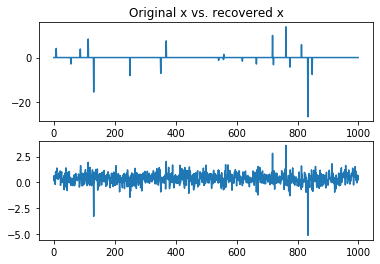

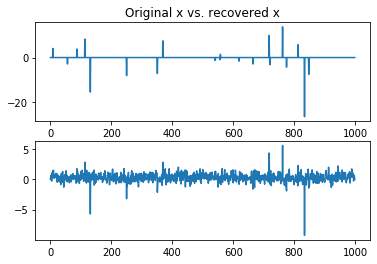

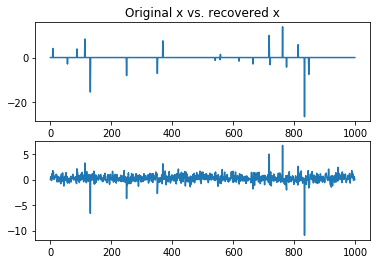

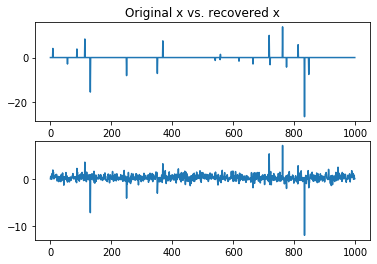

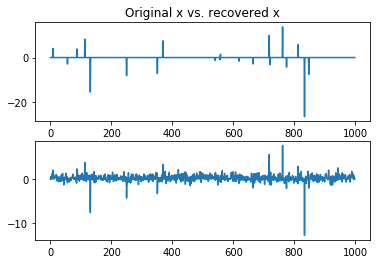

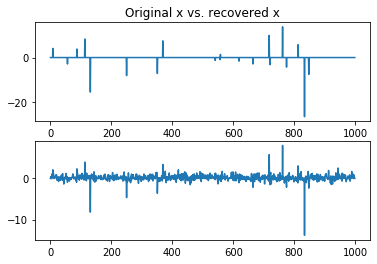

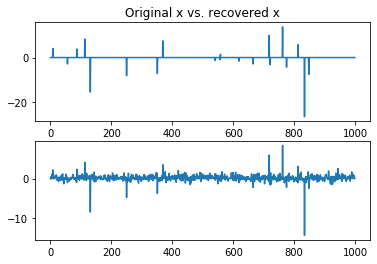

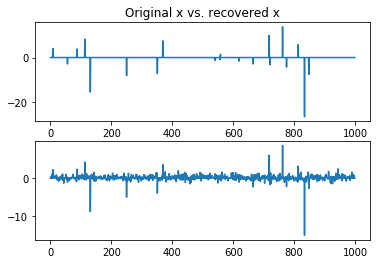

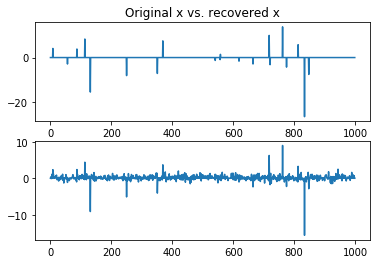

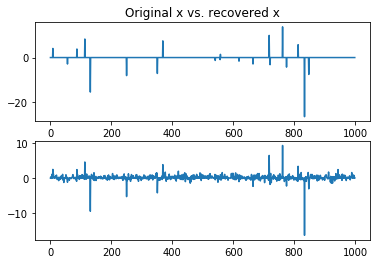

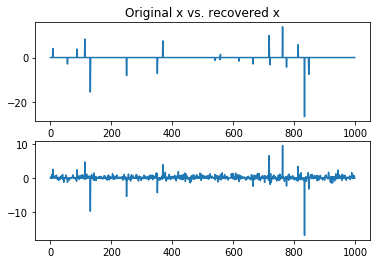

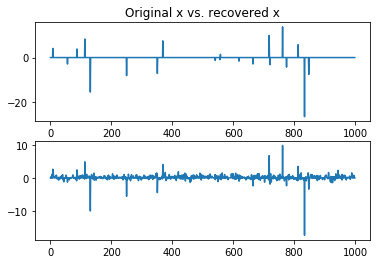

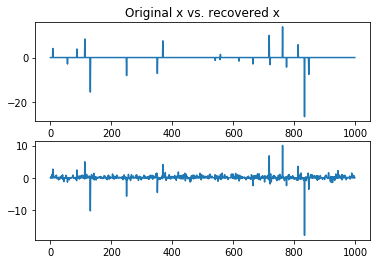

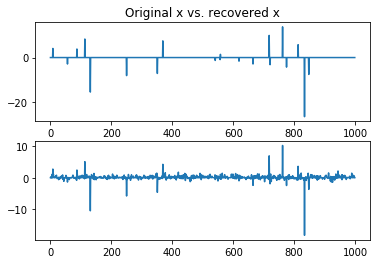

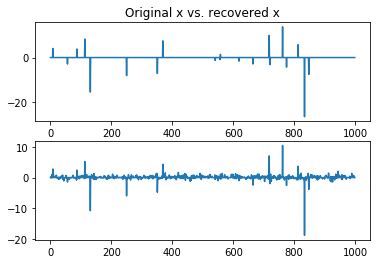

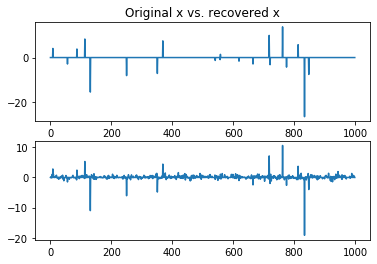

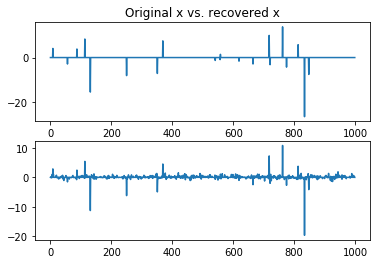

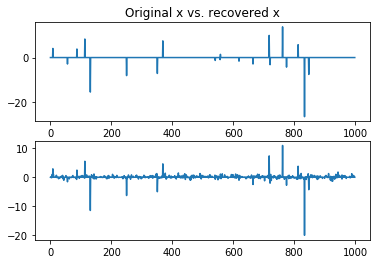

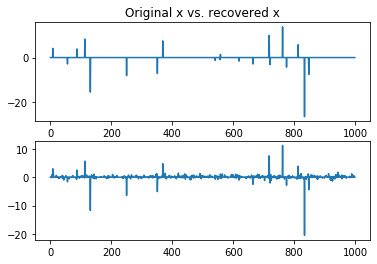

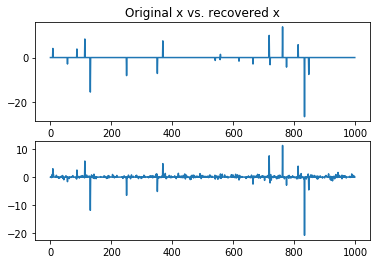

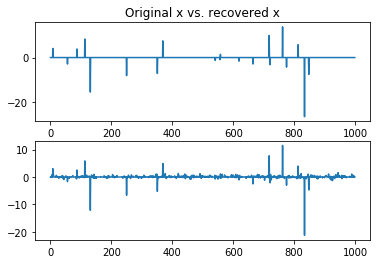

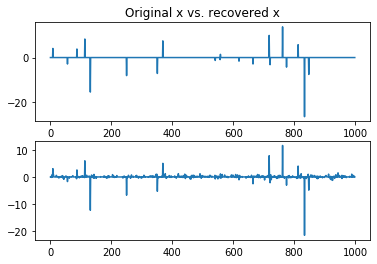

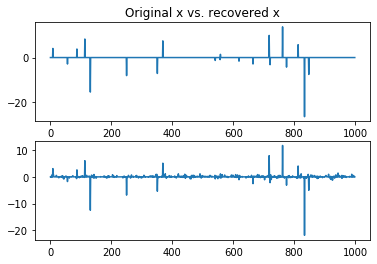

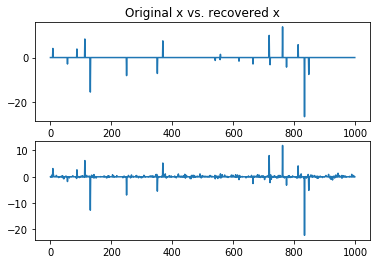

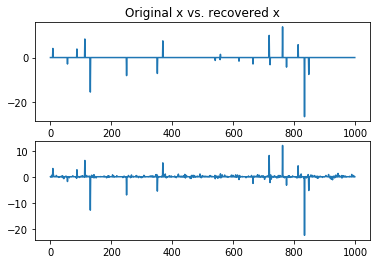

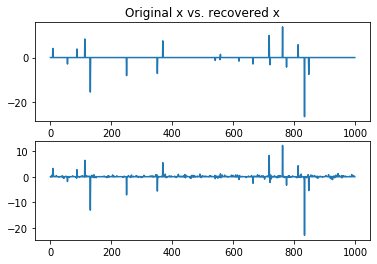

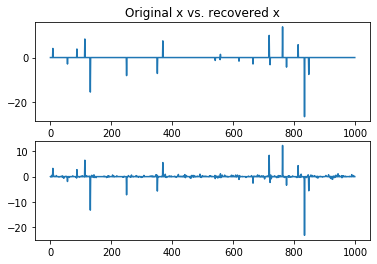

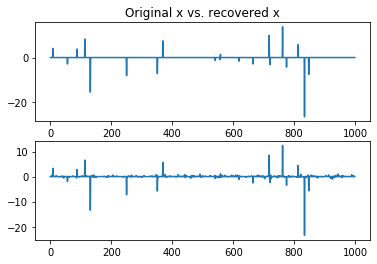

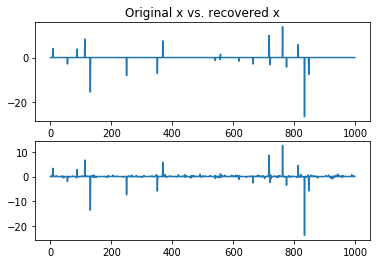

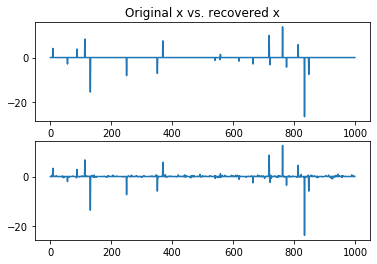

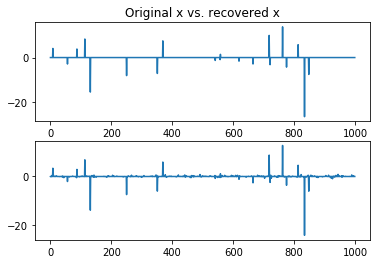

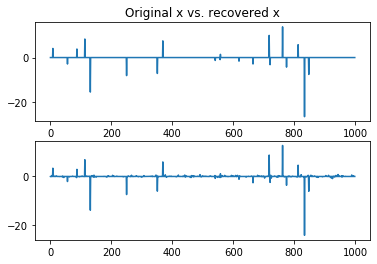

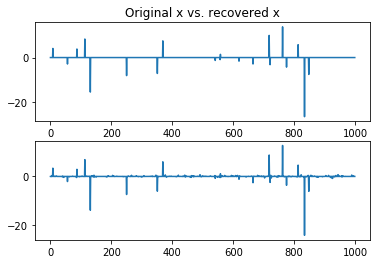

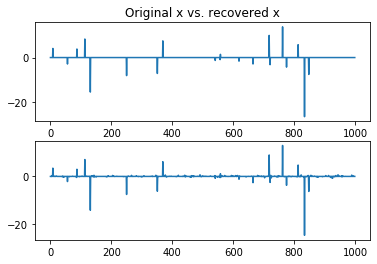

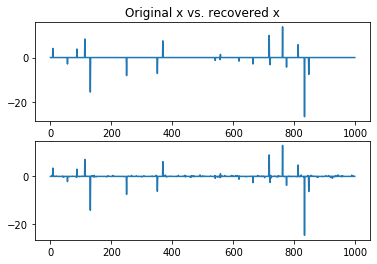

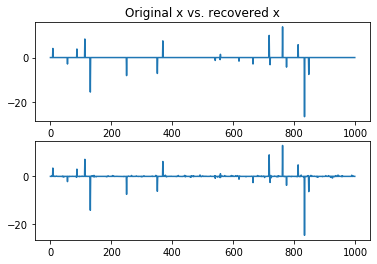

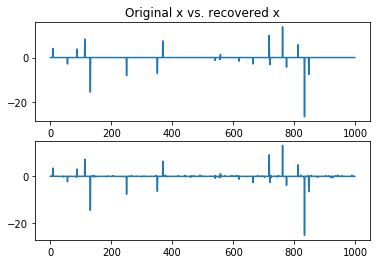

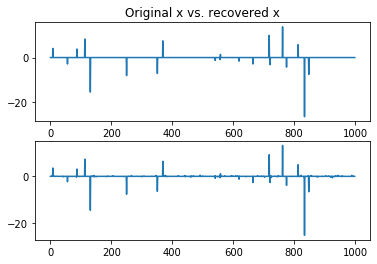

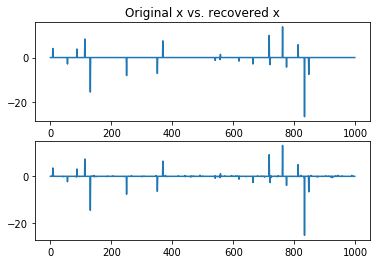

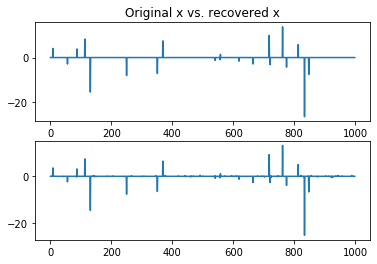

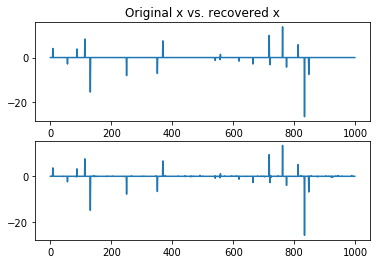

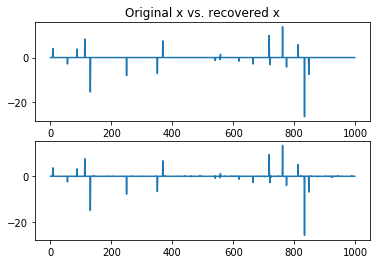

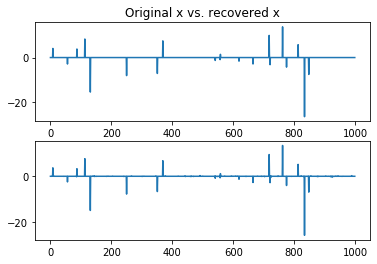

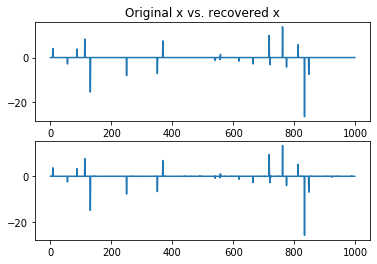

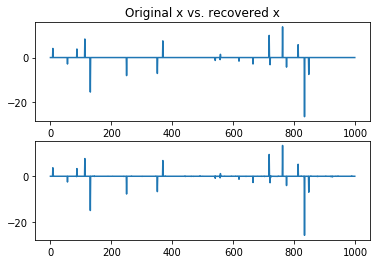

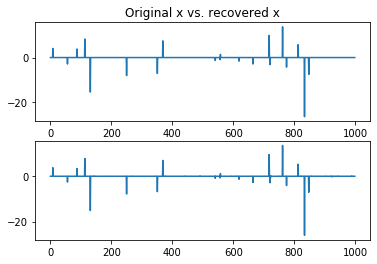

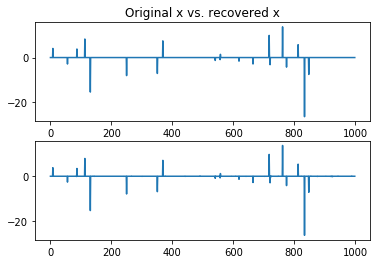

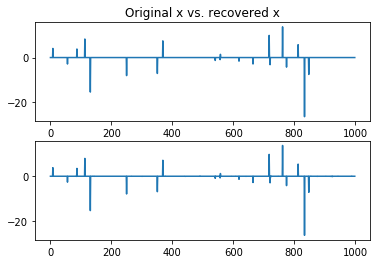

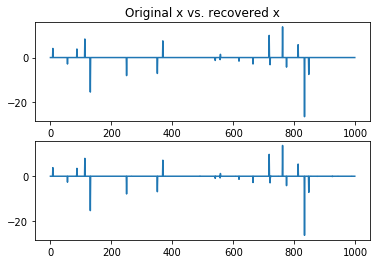

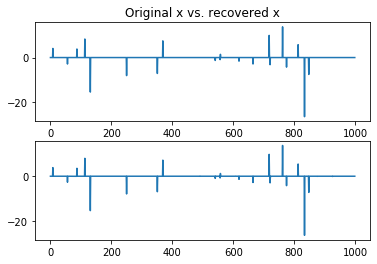

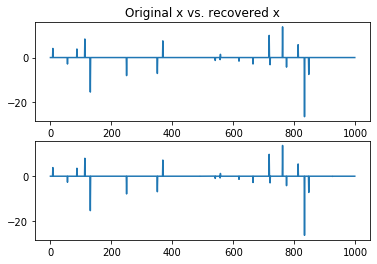

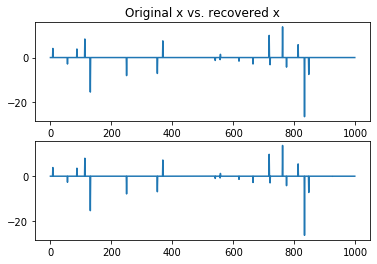

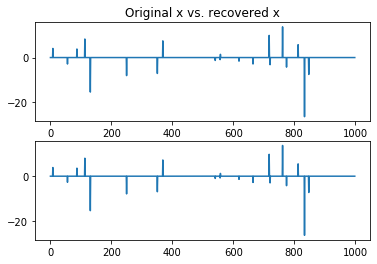

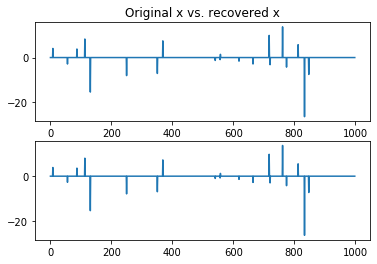

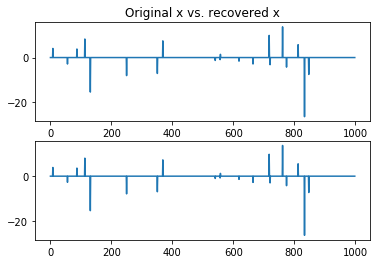

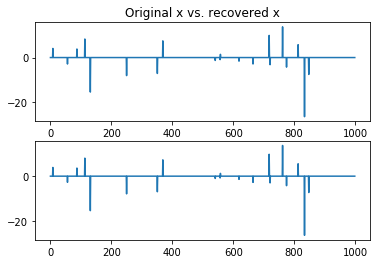

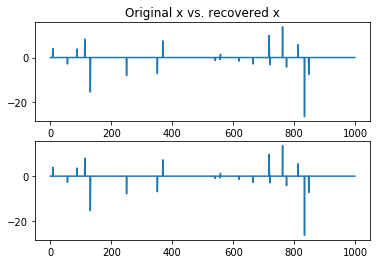

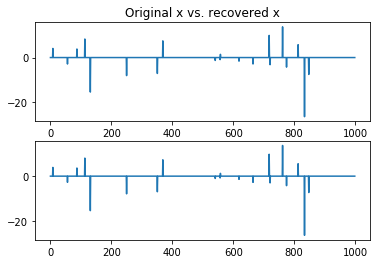

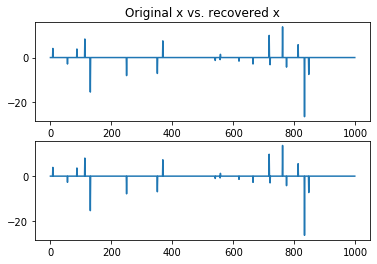

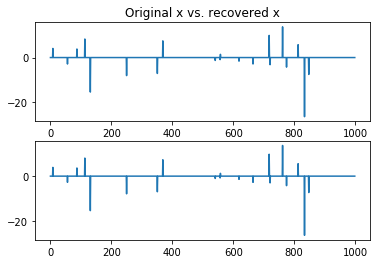

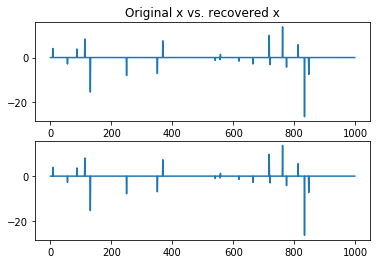

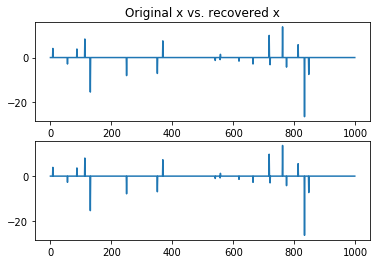

In [6]:
# Define parameters. Size of A is n x p
p = 1000
n = 500
kMax = 500   # Number of iteration
beta = 0.75 # decreasing factor for line search
# Generate the sparse vector xStar
# and Randomly set 20 elements
xStar = np.zeros((p,1))
xStar[np.floor(p*np.random.rand(20,1)).astype(np.int)]=1
xStar = xStar*np.random.normal(0,10,(p,1))

# Generate A and b. b = Ax + error
A = np.random.randn(n,p)
b = A.dot(xStar) + np.random.randn(n,1)
# This lamda is too large and making the x vector zero every time
lamda = np.sqrt(2*n*np.log(p)).tolist()

# Proximal Gradient Descent
xk = np.random.rand(p,1) # Initialize with random

for k in range(0, kMax):
    Gammak = 0.01 

    # Line search
    while True:
        x_kplus1 = xk - Gammak*grf(A,xk,b)        # Gradient Descent (GD) Step
        if f(A,x_kplus1,b) <= m(x_kplus1,xk,A,b,Gammak):
            break
        else:
            Gammak = beta*Gammak
    x_kplus1 = proxNorm1(x_kplus1,Gammak*lamda)   # Proximal Operation (Shrinkage)

    # Terminating Condition        
    Dobj = np.linalg.norm(obj(A,x_kplus1,b,lamda) - obj(A,xk,b,lamda))
    if(Dobj<0.1):
        break

    # Update xk
    xk = x_kplus1 

    # Graphical Display        
    plt.figure(2)
    plt.clf()        
    plt.subplot(211)    
    plt.plot(xStar)
    plt.title('Original x vs. recovered x')
    plt.subplot(212)
    plt.plot(xk)
    plt.draw()
    plt.pause(0.1)
plt.show()